<a href="https://colab.research.google.com/github/azusuki/public_Colaboratory/blob/master/%E3%82%B9%E3%82%AB%E3%83%A9%E3%83%BC%E3%83%BB%E3%83%99%E3%82%AF%E3%83%88%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
s = 5
s

5

In [0]:
v = np.array([5,-2,4])
v

array([ 5, -2,  4])

In [0]:
m = np.array([[5,12,6],[-3,0,14]])
m
m1 = np.array([[9,8,7],[1,3,-5]])

In [0]:
v.shape

(3,)

In [0]:
t = np.array([m,m1])
type(t)

numpy.ndarray

In [0]:
t.shape

(2, 2, 3)

In [0]:
m.T

array([[ 5, -3],
       [12,  0],
       [ 6, 14]])

In [0]:
v_reshap = v.reshape(3,1)
v_reshap

array([[ 5],
       [-2],
       [ 4]])

In [0]:
x = np.array([2,8,4])
y = np.array([1,-7,3])

In [0]:
np.dot(x,y)

-42

In [0]:
5*x

array([10, 40, 20])

In [0]:
object = 1000
xs = np.random.uniform(low = -10, high =10, size=(object,1))
zs = np.random.uniform(-10,10, size=(object,1))
inputs = np.column_stack((xs, zs))
inputs.shape

(1000, 2)

In [0]:
noise = np.random.uniform(-1,1, size=(object,1))
targets = 2*xs - 3*zs + 5 + noise

targets.shape

(1000, 1)

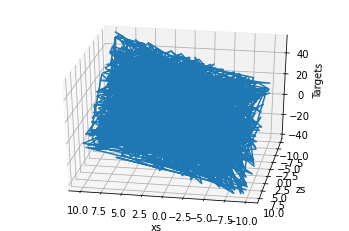

In [0]:
# 3D plotを使うためにはオブジェクトはある形状でなければいけないことから、reshapeメソッドを使っていきます
targets = targets.reshape(object,)

# matplotlib.pyplotを使って散布図を作成していきます

# 変数を宣言します
fig = plt.figure()

# 3dのグラフを作成するためのメソッドを書いていきます
ax = fig.add_subplot(111, projection='3d')

# 軸を選びます
ax.plot(xs, zs, targets)

# ラベルに名前を付けます
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# azimの値を変えることで、グラフをどこから見るのかという点を変更することができます
ax.view_init(azim=100)

# 実際に散布図を表示していきます 
plt.show()

# ターゲットの形状を元に戻していきます
targets = targets.reshape(object,1)

In [0]:
init_range =0.1
weights = np.random.uniform(low = - init_range, high =init_range, size=(2,1))
biases = np.random.uniform(low = - init_range, high =init_range, size=1)

print(weights)
print(biases)

[[-0.04848901]
 [ 0.02743237]]
[0.05806091]


In [0]:
# 今回の例では、学習率が0.02だと非常に良く機能します。
learning_rate = 0.02

In [0]:
for i in range(200):
      
    # y = xw + b の線形モデルの等式です
    outputs = np.dot(inputs,weights) + biases
    # デルタは出力とターゲットの差を示しています
    # ここではデルタは1000x1のベクトルです
    deltas = outputs - targets
        
    # L2ノルム損失を使って損失の計算をしていきます。値を2で割っていますが、これは最小値を見つけるという意味では影響はありません。
    # また、コードを一般化させるためにデータの数で割っています。
    loss = np.sum(deltas ** 2) / 2 / object
    
    # それぞれの繰り返しにおける損失関数の値を出力します.
    print (loss)
    
    # 損失関数の場合と同じように、デルタに関してもデータの数で割っていきます
    deltas_scaled = deltas / object
    
    # 勾配降下法のアルゴリズムを適用していきます
    # 重みは2x1, 学習率は1x1 (scalar), 入力は1000x2, デルタは1000x1となります
    # 演算を適切に行うために、入力の転置を取ります
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

0.38561418377347045
0.37716037978863864
0.36904053711760604
0.3612414628640968
0.3537504853075076
0.3465554333142416
0.33964461656239436
0.3330068065476346
0.3266312183394447
0.3205074930580598
0.3146256810436477
0.3089762256903775
0.3035499479191067
0.2983380312634696
0.29333200754512445
0.2885237431148937
0.2839054256374311
0.2794695513979575
0.2752089131104327
0.27111658820735374
0.2671859275921597
0.2634105448359637
0.25978430580105816
0.25630131867433753
0.2529559243944442
0.2497426874570789
0.24665638708354687
0.24369200873817842
0.2408447359808501
0.23810994264136587
0.23548318530298457
0.23296019608287688
0.23053687569778866
0.2282092868036379
0.22597364759822733
0.22382632567667662
0.22176383212959042
0.21978281587437443
0.21788005821049086
0.21605246758980035
0.2142970745935014
0.2126110271074989
0.210991585688371
0.20943611911239332
0.20794210010040204
0.20650710121153906
0.20512879089921354
0.2038049297228691
0.20253336670940292
0.20131203585832436
0.2001389527849729
0.1990

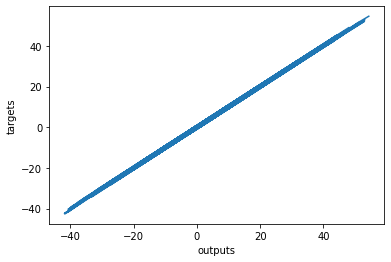

In [0]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()